In [1]:
# Import library for load data
import ray
ray.init(num_cpus=8)
import modin.pandas as pd
#import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from category_encoders import OrdinalEncoder
from numpy import genfromtxt
import sys
import csv
# Import deeplearning library
import torch 
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms 
import matplotlib.pyplot as plt
import time
import os
import glob
import copy
import numpy as np 
import sys
sys.path.append('/home/jun/DDoSDeepLearningProject/')
from CustomFunction import *
from model_define import *


2023-07-28 20:49:01,042	INFO worker.py:1636 -- Started a local Ray instance.


In [2]:
print('-------------ANALYZE DATASET-------------')
CICIDS2019 = pd.read_csv('/home/jun/DDoSDeepLearningProject/dataset_ddos/CICIDS2019.csv')
CICIDS2018 = pd.read_csv('/home/jun/DDoSDeepLearningProject/dataset_ddos/CICIDS2018.csv')
CICIDS2017 = pd.read_csv('/home/jun/DDoSDeepLearningProject/dataset_ddos/CICIDS2017.csv')
print("ALL DONE!")
    

-------------ANALYZE DATASET-------------


Data types of partitions are different! Please refer to the troubleshooting section of the Modin documentation to fix this issue.


ALL DONE!


In [3]:
CICIDS2017 =  encoding_labels('CICIDS2017_anomaly', CICIDS2017)
CICIDS2018 =  encoding_labels('CICIDS2018_anomaly', CICIDS2018)
CICIDS2019 =  encoding_labels('CICIDS2019_anomaly', CICIDS2019)

In [4]:
# Get list of avaible labels
CICIDS2019_labels = set(CICIDS2019['Label'])
CICIDS2018_labels = set(CICIDS2018['Label'])
CICIDS2017_labels = set(CICIDS2017['Label'])
print("Labels of CICIDS2019:", CICIDS2019_labels)
print("Labels of CICIDS2018:", CICIDS2018_labels)
print("Labels of CICIDS2017:", CICIDS2017_labels)

Labels of CICIDS2019: {0, 1}
Labels of CICIDS2018: {0, 1}
Labels of CICIDS2017: {0, 1}


In [5]:
#Check for NaN and Inf Columnns
print("CICIDS2019 Dataset: Contain NaN values columns:", CICIDS2019.columns[CICIDS2019.isna().any()].tolist())
print("CICIDS2019 Dataset Contain infinity values columns:", CICIDS2019.columns[CICIDS2019.isin([np.inf, -np.inf]).any()].tolist())
print("CICIDS2018 Dataset: Contain NaN values columns:", CICIDS2018.columns[CICIDS2018.isna().any()].tolist())
print("CICIDS2018 Dataset Contain infinity values columns:", CICIDS2018.columns[CICIDS2018.isin([np.inf, -np.inf]).any()].tolist())
print("CICIDS2017 Dataset: Contain NaN values columns:", CICIDS2017.columns[CICIDS2017.isna().any()].tolist())
print("CICIDS2017 Contain infinity values columns:", CICIDS2017.columns[CICIDS2017.isin([np.inf, -np.inf]).any()].tolist())#print("Test Dataset: Contain NaN values columns:", test.columns[test.isna().any()].tolist())
#print("Test Dataset Contain infinity values columns:", test.columns[test.isin([np.inf, -np.inf]).any()].tolist())

CICIDS2019 Dataset: Contain NaN values columns: ['Flow Bytes/s']
CICIDS2019 Dataset Contain infinity values columns: ['Flow Bytes/s', 'Flow Packets/s']
CICIDS2018 Dataset: Contain NaN values columns: ['Flow Bytes/s']
CICIDS2018 Dataset Contain infinity values columns: ['Flow Bytes/s', 'Flow Packets/s']
CICIDS2017 Dataset: Contain NaN values columns: ['Flow Bytes/s']
CICIDS2017 Contain infinity values columns: ['Flow Bytes/s', 'Flow Packets/s']


Number of 1 flow is: 50006248/50063110 (99.89)
Number of 0 flow is: 56862/50063110 (0.11)


<Figure size 2000x500 with 0 Axes>

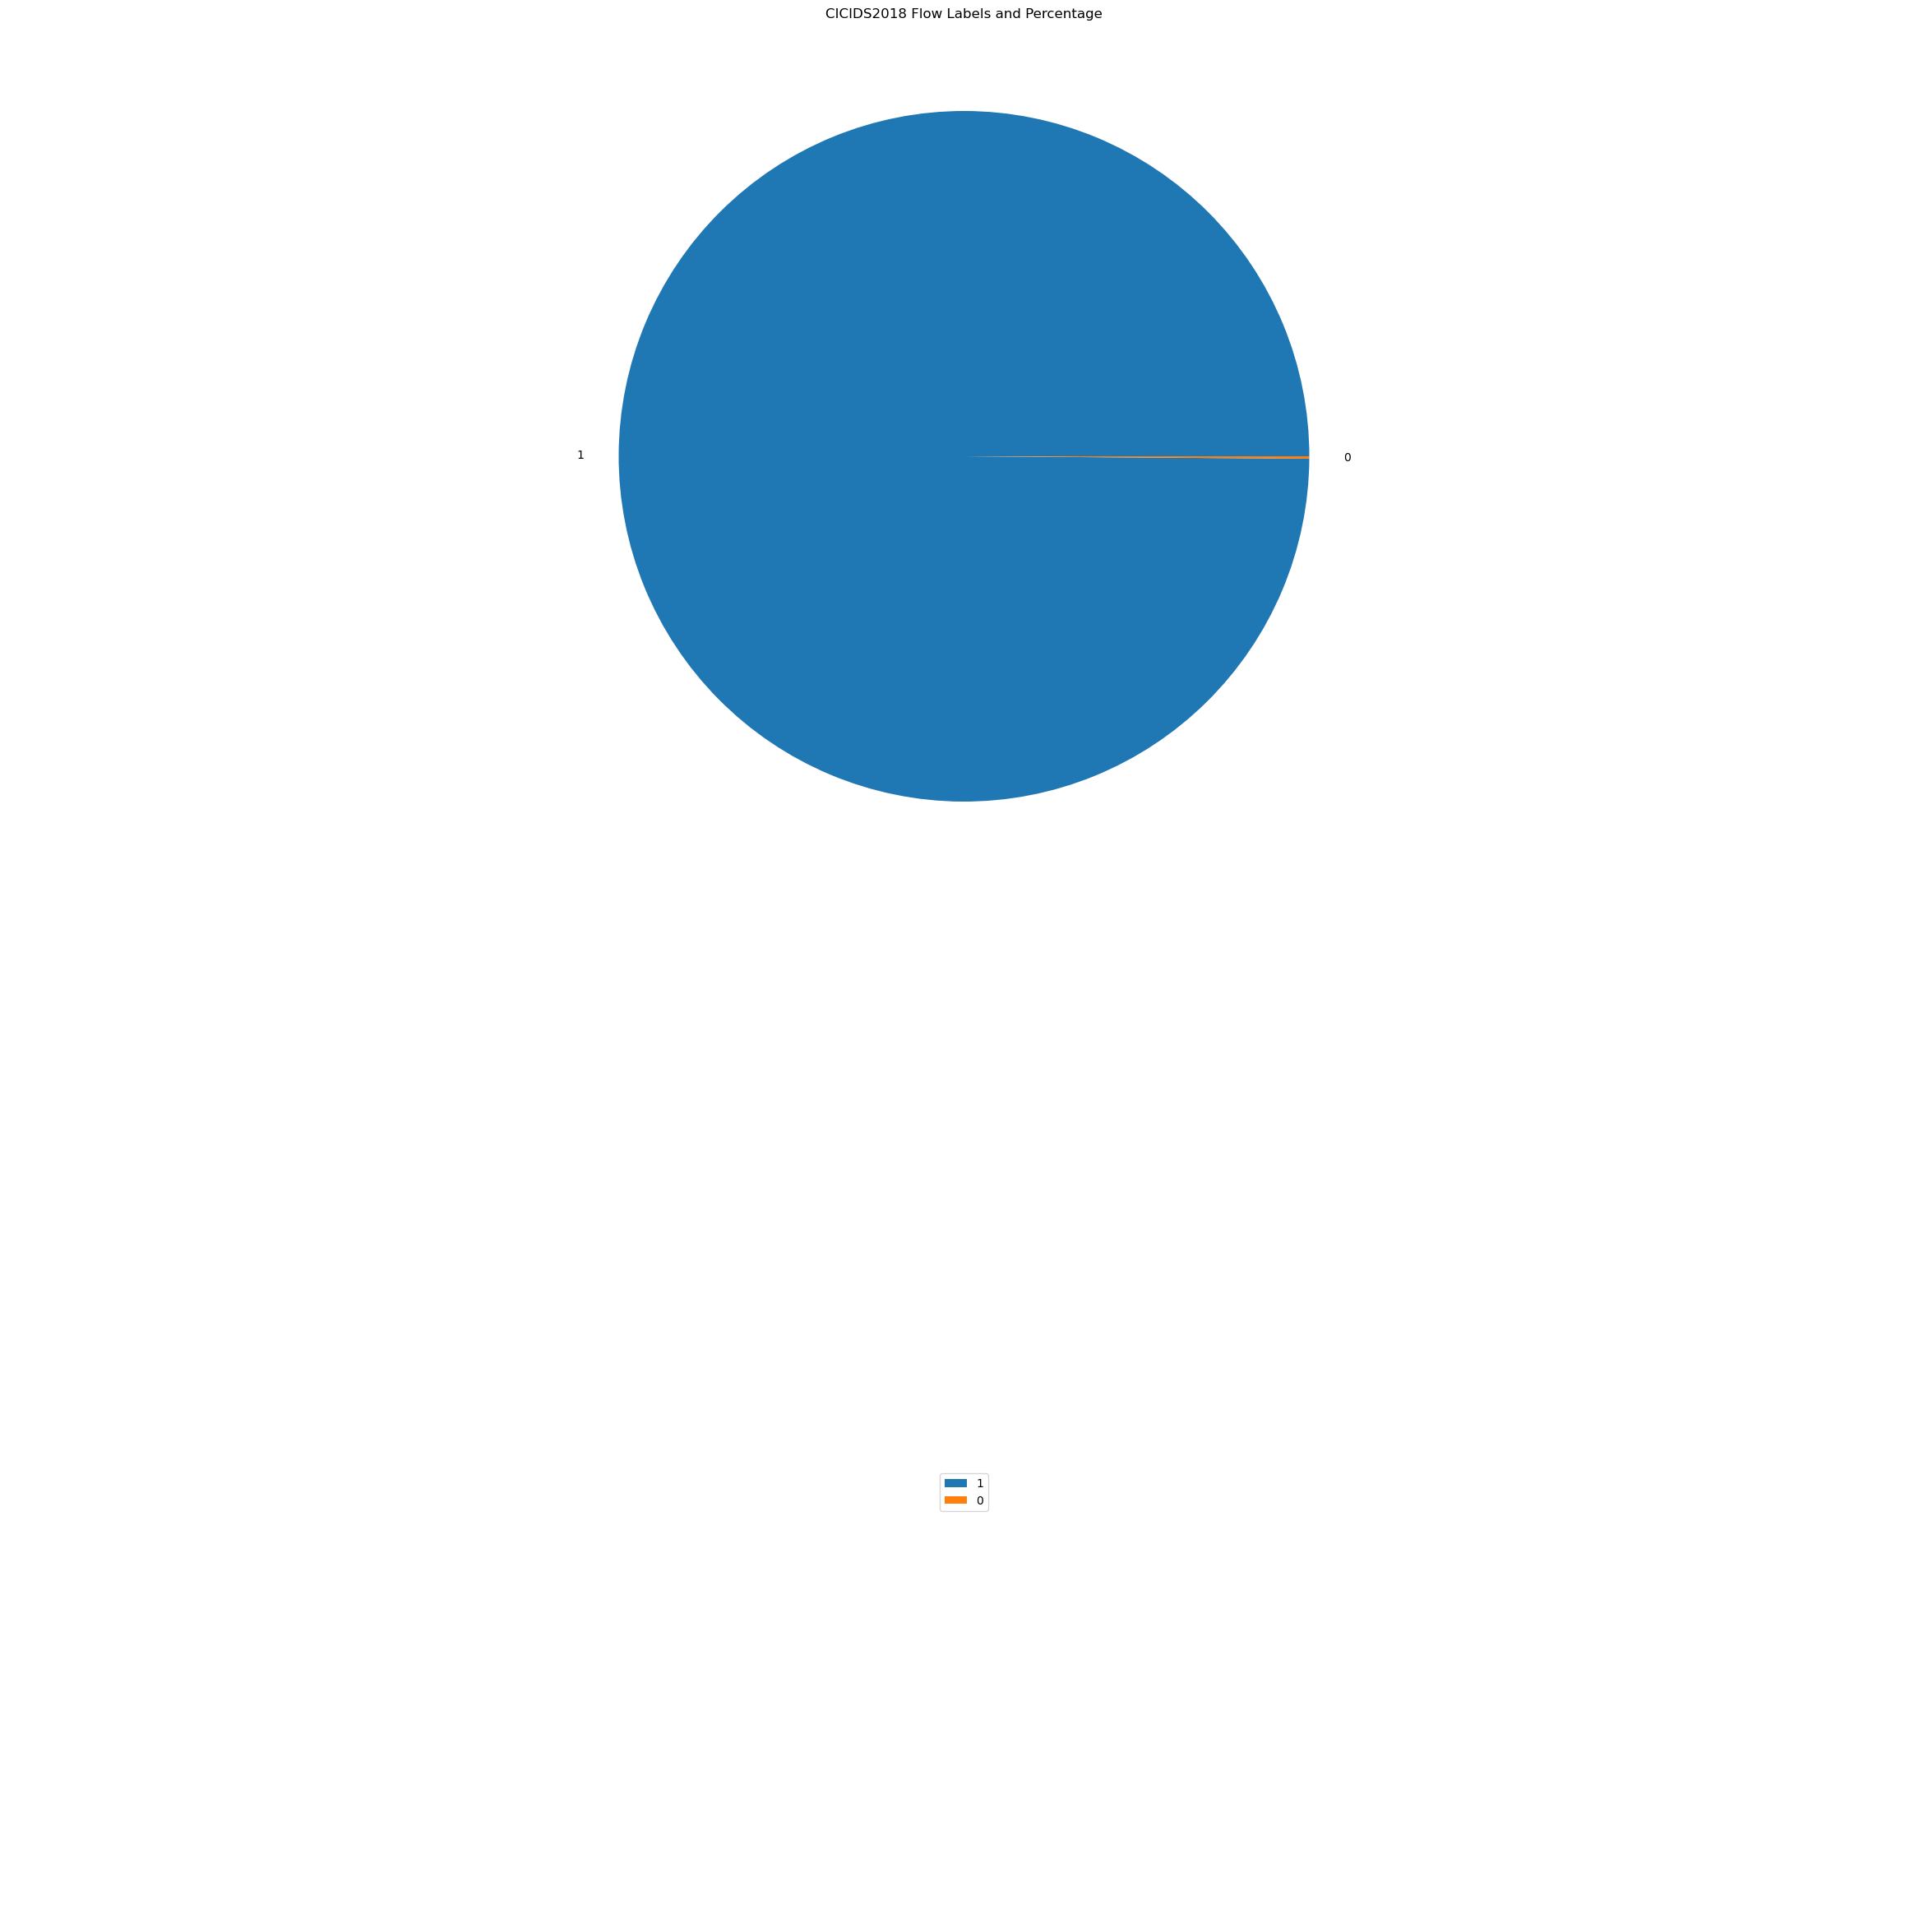

In [6]:
#CICIDS2019 data plot
CICIDS2019_flow_labels = flows_labels_count(CICIDS2019)
for flow_label, flow_number in CICIDS2019_flow_labels.items():
        print('Number of {} flow is: {}/{} ({:.2f})'.format(flow_label, flow_number, sum(CICIDS2019_flow_labels.values()), flow_number/sum(CICIDS2019_flow_labels.values())*100))
#Create Packets Number based on label Figure
CICIDS2019_flow_figure_num = plt.figure(figsize = (20, 5))
fig = plt.figure(20, figsize=(30,30))
ax = fig.add_subplot(211)
ax.set_title("CICIDS2018 Flow Labels and Percentage")
pie = ax.pie(CICIDS2019_flow_labels.values(),labels = CICIDS2019_flow_labels.keys())
ax2 = fig.add_subplot(212)
ax2.axis("off") 
ax2.legend(pie[0], CICIDS2019_flow_labels.keys(), loc = 'center')

Number of 0 flow is: 13484707/15402939 (87.55)
Number of 1 flow is: 1918232/15402939 (12.45)


<Figure size 2000x500 with 0 Axes>

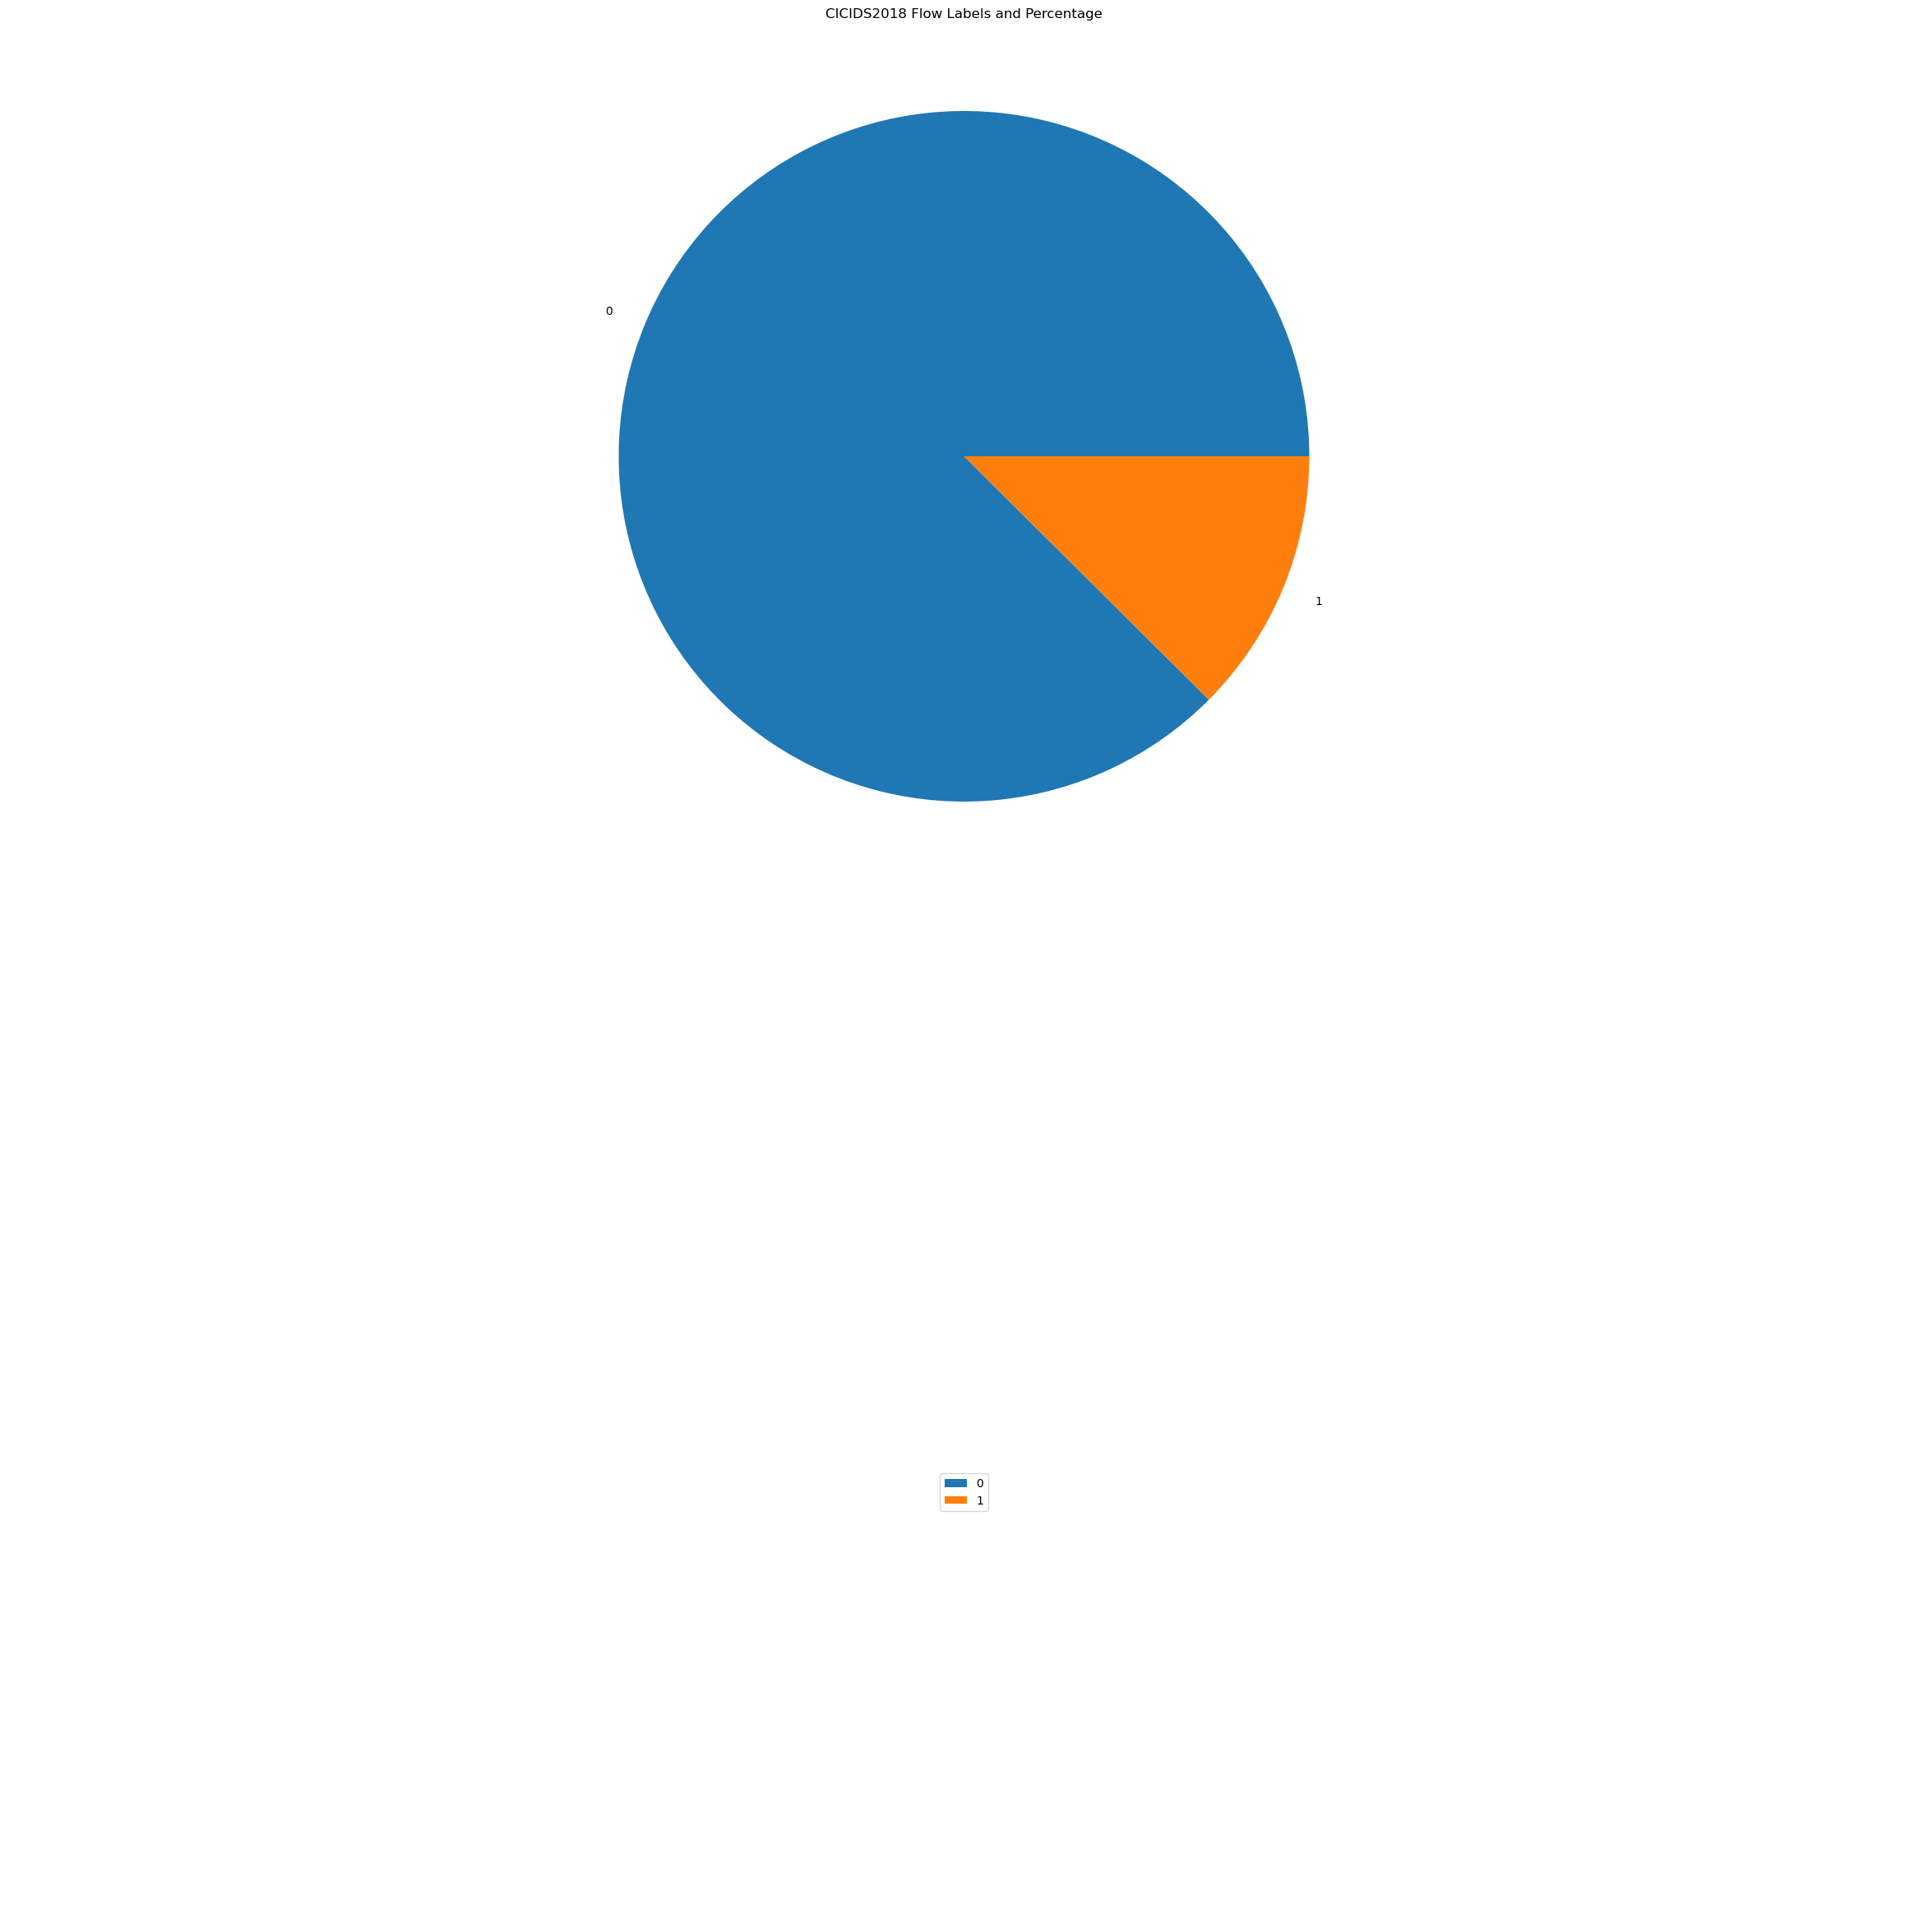

In [7]:
#CICIDS2018 data plot
CICIDS2018_flow_labels = flows_labels_count(CICIDS2018)
for flow_label, flow_number in CICIDS2018_flow_labels.items():
        print('Number of {} flow is: {}/{} ({:.2f})'.format(flow_label, flow_number, sum(CICIDS2018_flow_labels.values()), flow_number/sum(CICIDS2018_flow_labels.values())*100))
#Create Packets Number based on label Figure
CICIDS2018_flow_figure_num = plt.figure(figsize = (20, 5))
# creating the pie chart plot
fig = plt.figure(20, figsize=(30,30))
ax = fig.add_subplot(211)
ax.set_title("CICIDS2018 Flow Labels and Percentage")
pie = ax.pie(CICIDS2018_flow_labels.values(),labels = CICIDS2018_flow_labels.keys())
ax2 = fig.add_subplot(212)
ax2.axis("off") 
ax2.legend(pie[0], CICIDS2018_flow_labels.keys(), loc = 'center')

plt.show()

Number of 0 flow is: 2104910/2485597 (84.68)
Number of 1 flow is: 380687/2485597 (15.32)


<Figure size 2000x500 with 0 Axes>

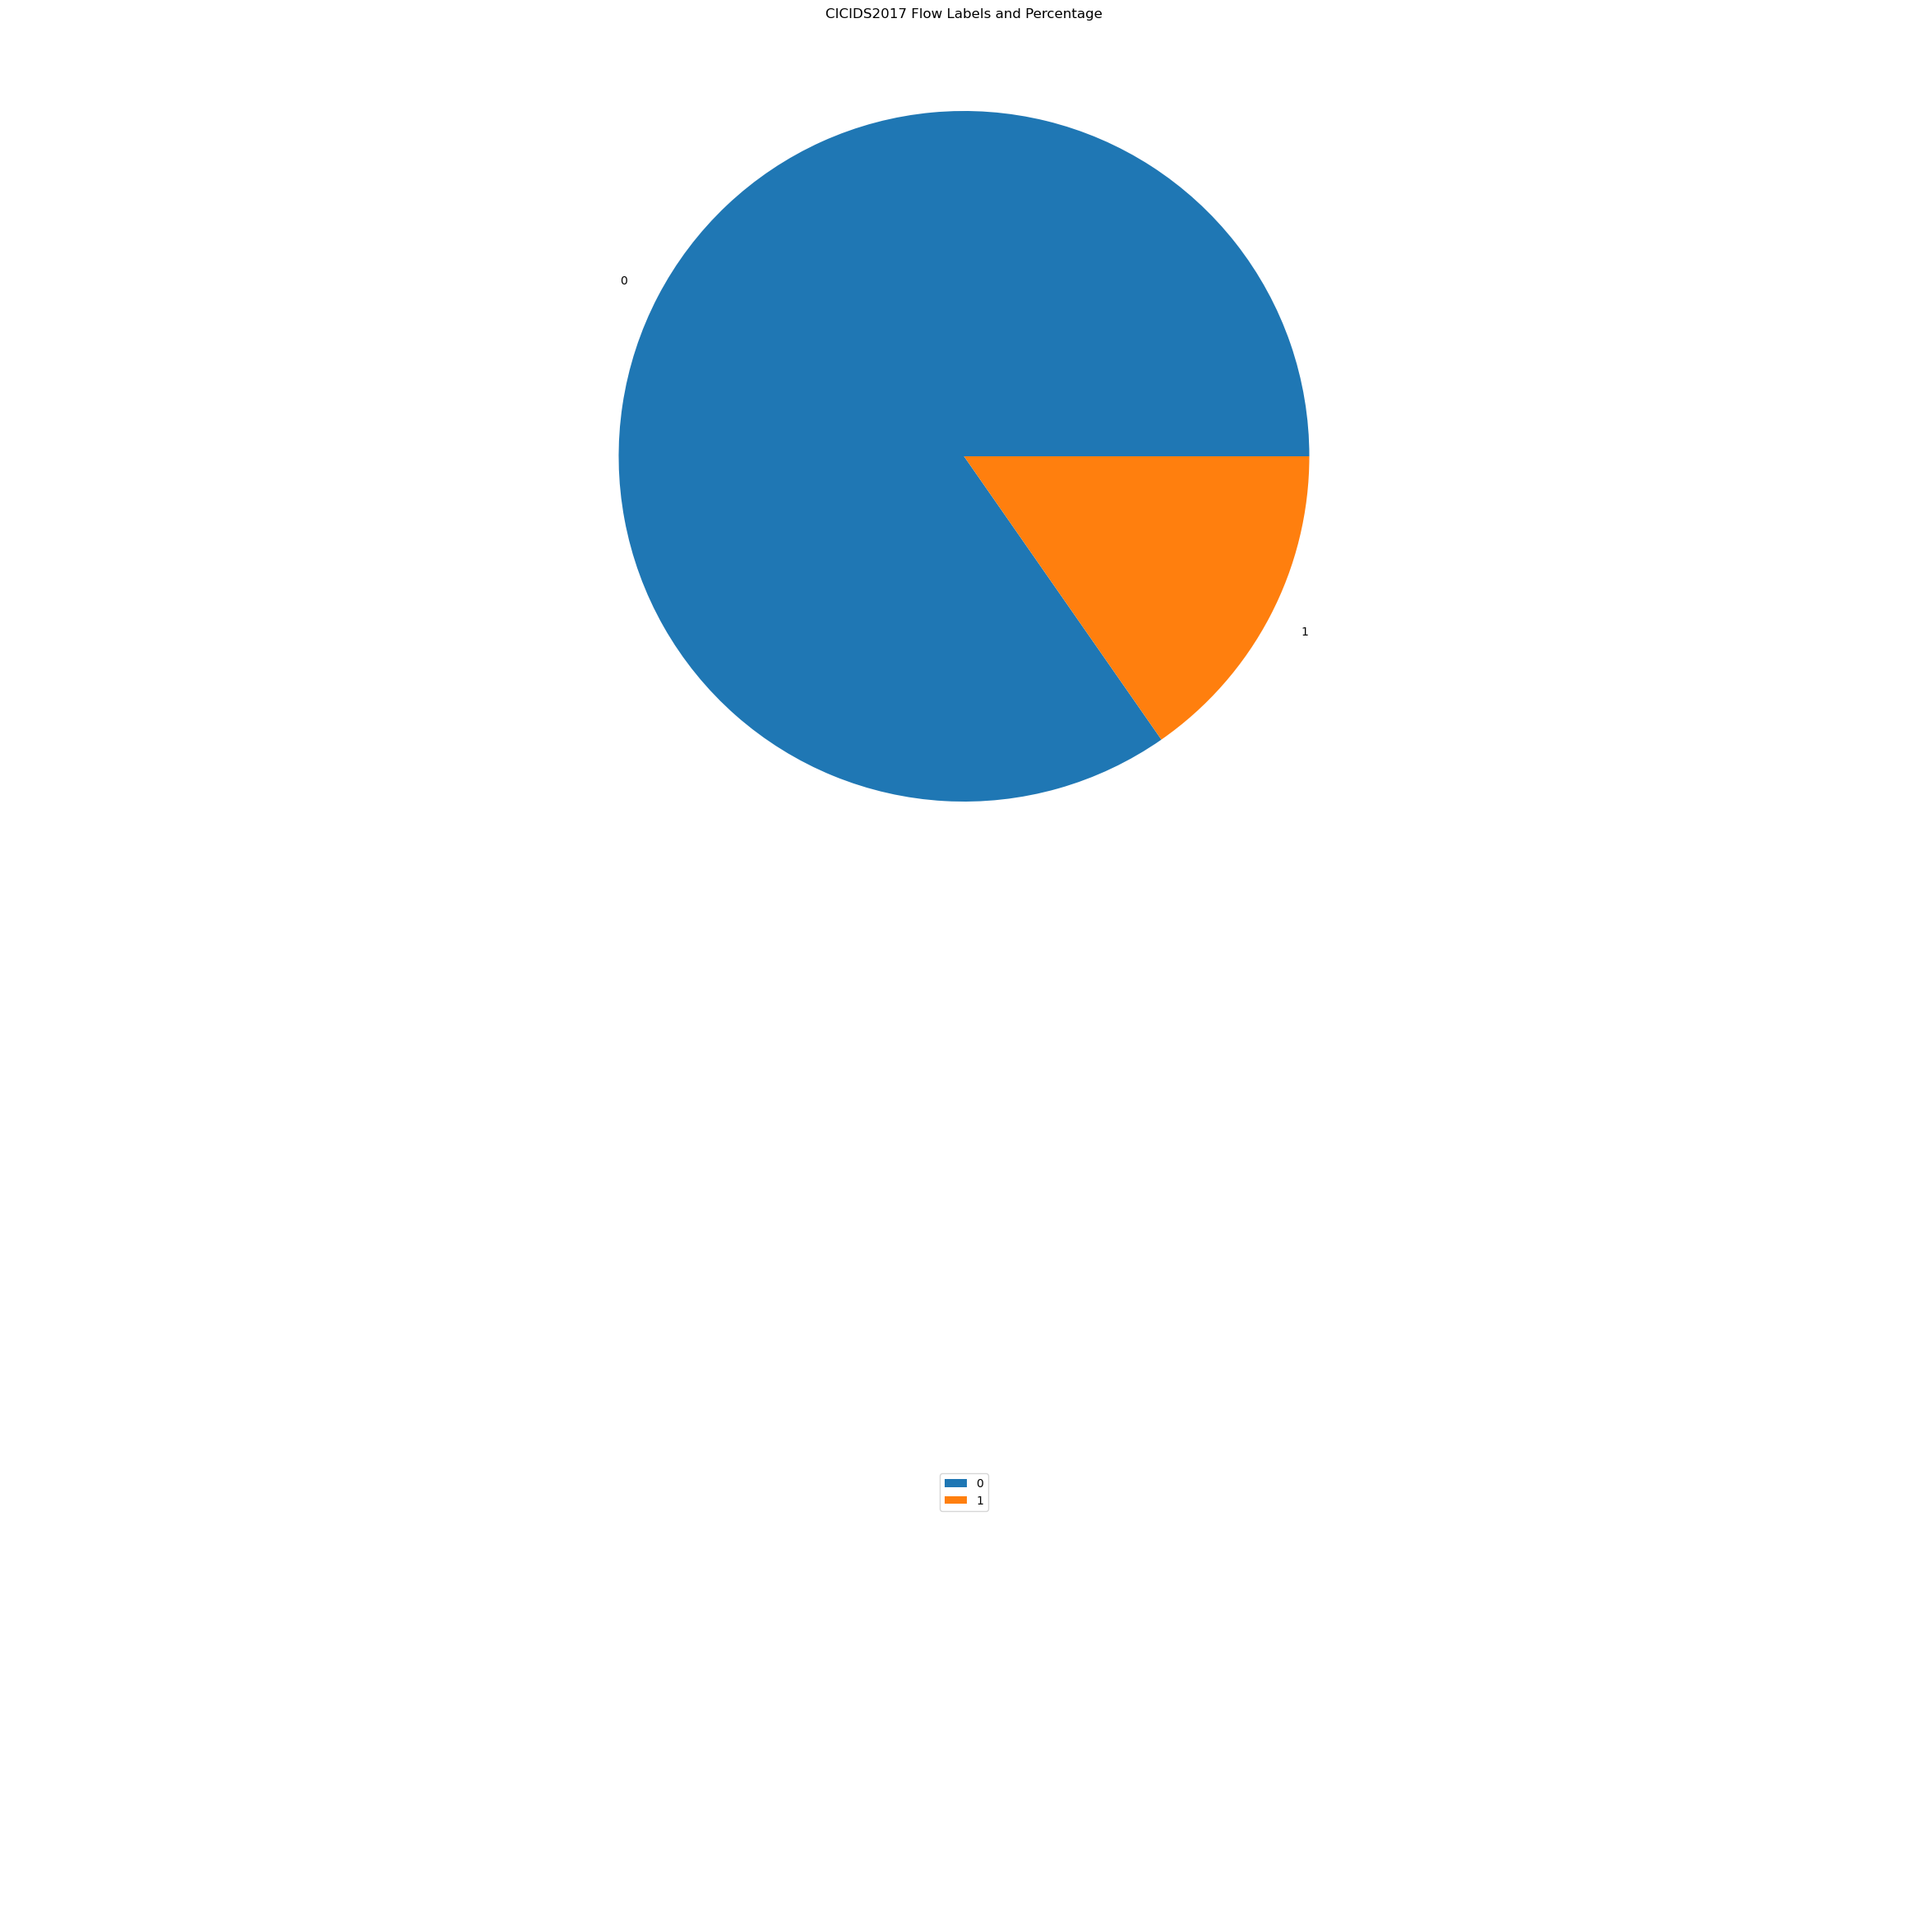

In [8]:
#CICIDS2017 data plot
CICIDS2017_flow_labels = flows_labels_count(CICIDS2017)
for flow_label, flow_number in CICIDS2017_flow_labels.items():
        print('Number of {} flow is: {}/{} ({:.2f})'.format(flow_label, flow_number, sum(CICIDS2017_flow_labels.values()), flow_number/sum(CICIDS2017_flow_labels.values())*100))
#Create Packets Number based on label Figure
CICIDS2017_flow_figure_num = plt.figure(figsize = (20, 5))
# creating the bar plot
fig = plt.figure(20, figsize=(30,30))
ax = fig.add_subplot(211)
ax.set_title("CICIDS2017 Flow Labels and Percentage")
pie = ax.pie(CICIDS2017_flow_labels.values(),labels = CICIDS2017_flow_labels.keys())
ax2 = fig.add_subplot(212)
ax2.axis("off") 
ax2.legend(pie[0], CICIDS2017_flow_labels.keys(), loc = 'center')

In [9]:
CICIDS2019 = drop_NaN(CICIDS2019)
CICIDS2019_dropped_labels = flows_labels_count(CICIDS2019)
CICIDS2018 = drop_NaN(CICIDS2018)
CICIDS2018_dropped_labels = flows_labels_count(CICIDS2018)
CICIDS2017 = drop_NaN(CICIDS2017)
CICIDS2017_dropped_labels = flows_labels_count(CICIDS2017)

In [10]:
# CICIDS2019 dropped number of flows
for flow_label, flow_number in CICIDS2019_dropped_labels.items():
    print('({}) Dropped CICIDS2019 flow number is: {} ({:.2f}%)'.format(flow_label, -flow_number + CICIDS2019_flow_labels[flow_label], (-flow_number + CICIDS2019_flow_labels[flow_label])/flow_number*100))

(1) Dropped CICIDS2019 flow number is: 1362798 (2.80%)
(0) Dropped CICIDS2019 flow number is: 438 (0.78%)


In [11]:
# CICIDS2018 dropped number of flows
for flow_label, flow_number in CICIDS2018_dropped_labels.items():
    print('({}) Dropped CICIDS2018 flow number is: {} ({:.2f}%)'.format(flow_label, -flow_number + CICIDS2018_flow_labels[flow_label], (-flow_number + CICIDS2018_flow_labels[flow_label])/flow_number*100))

(0) Dropped CICIDS2018 flow number is: 94459 (0.71%)
(1) Dropped CICIDS2018 flow number is: 0 (0.00%)


In [12]:
# CICIDS2017 dropped number of flows
for flow_label, flow_number in CICIDS2017_dropped_labels.items():
    print('({}) Dropped CICIDS2017 flow number is: {} ({:.2f}%)'.format(flow_label, -flow_number + CICIDS2017_flow_labels[flow_label], (-flow_number + CICIDS2017_flow_labels[flow_label])/flow_number*100))

(0) Dropped CICIDS2017 flow number is: 1642 (0.08%)
(1) Dropped CICIDS2017 flow number is: 951 (0.25%)
